<a href="https://colab.research.google.com/github/sofiarossatti/DataVisualization/blob/main/brutta_copia_clusterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this colab notebook I tried to understand how many clusters should I consider for my PCA analysis. I decided randomly to work on 2019 and 2021 and see how many groups I could get.

---



# Libraries installation

In [16]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 42.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=89815f8d2c648bdaceef38e19e1326198ab6909540f1580d4a3ca1a5d56216b6
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer

In [2]:
paygap = pd.read_csv("pay_gap_Europe.csv")
paygap.info()
columns_to_drop = ['GDP', 'Urban_population'] # I'm dropping these columns because I'm not interested in them for the project
paygap = paygap.drop(columns_to_drop, axis=1)

paygap_2021 = paygap[paygap['Year']==2021]
paygap_2019 = paygap[paygap['Year']==2019]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  324 non-null    object 
 1   Year                     324 non-null    int64  
 2   GDP                      324 non-null    int64  
 3   Urban_population         324 non-null    float64
 4   Industry                 321 non-null    float64
 5   Business                 320 non-null    float64
 6   Mining                   303 non-null    float64
 7   Manufacturing            318 non-null    float64
 8   Electricity_supply       301 non-null    float64
 9   Water_supply             312 non-null    float64
 10  Construction             312 non-null    float64
 11  Retail trade             317 non-null    float64
 12  Transportation           318 non-null    float64
 13  Accommodation            315 non-null    float64
 14  Information              3

# Clusterization for 2019

In [3]:
paygap_2019.fillna(paygap_2019.mean(), inplace=True) # By looking at the information we can see some null values, so I decided to fill them with the mean of the values.

paygap_2019 = paygap_2019.drop(['Year'], axis=1) # I drop the column Year since I'm considering always the year 2019

num_cols = [col for col in paygap_2019.columns if paygap_2019[col].dtype in ['int64','float64']]

cv_2019 = (paygap_2019[num_cols].std() / paygap_2019[num_cols].mean())*100
cv_df = pd.DataFrame({'CV': cv_2019})
cv_df

<ipython-input-3-1ca1454c13b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  paygap_2019.fillna(paygap_2019.mean(), inplace=True) # By looking at the information we can see some null values, so I decided to fill them with the mean of the values.
<ipython-input-3-1ca1454c13b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paygap_2019.fillna(paygap_2019.mean(), inplace=True) # By looking at the information we can see some null values, so I decided to fill them with the mean of the values.


,CV
Industry,43.302973
Business,25.152058
Mining,139.229100
Manufacturing,34.713382
Electricity_supply,58.946740
Water_supply,460.780175
Construction,-1292.587401
Retail trade,27.411317
Transportation,243.750155
Accommodation,46.838065


Since an acceptable coefficient of variation value is between 20-30, our data need to be normalized, as there is a high degree of heterogeneity among features.
In addition, PCA is sensitive to scale and because of that, it's a good practice to standardize your data before applying PCA.

In [4]:
max_paygap_2019 = paygap_2019.drop(['Country'], axis=1)
max_values_2019 = max_paygap_2019.max()
max_rows_2019 = max_paygap_2019.idxmax()
Countries = paygap_2019["Country"]
result_df_2019 = pd.DataFrame({'Max Value': max_values_2019, 'Row': max_rows_2019})

merged_df_2019 = pd.merge(result_df_2019, pd.DataFrame({'Country': Countries}), left_on='Row', right_index=True)
merged_df_2019.drop(["Row"], axis=1)

,Max Value,Country
Industry,21.7,Estonia
Business,23.2,Estonia
Construction,13.0,Estonia
Retail trade,32.7,Estonia
Mining,43.7,Cyprus
Transportation,14.9,Cyprus
Professional_scientific,28.7,Cyprus
Manufacturing,25.4,Slovakia
Public_administration,19.4,Slovakia
Electricity_supply,20.5,Germany


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Max Value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Max Value'], **{})
chart

In [5]:
X_2019 = paygap_2019[num_cols]

# normalizing features
X_norm_2019 = (X_2019 - X_2019.mean(axis=0))/X_2019.std(axis=0)

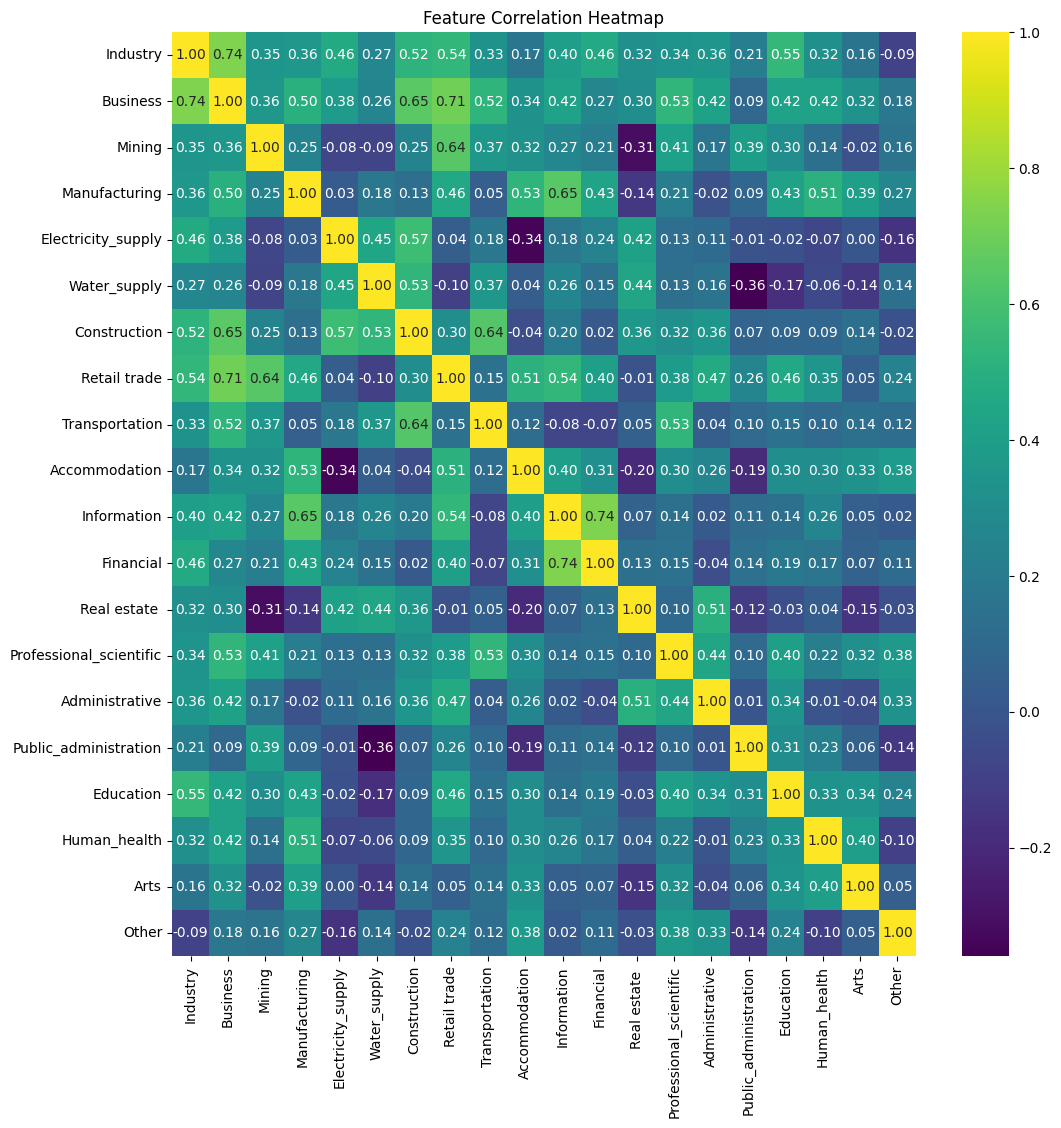

In [8]:
corr_matrix_2019 = np.corrcoef(X_norm_2019.T)

# create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix_2019, cmap='viridis', annot=True, fmt='.2f',
            xticklabels=paygap_2019[num_cols].columns, yticklabels=paygap_2019[num_cols].columns)

# set plot title
plt.title('Feature Correlation Heatmap')

# show plot
plt.show()

In [12]:
# principal component analysis on features
pca_2019 = PCA()

# fit and transform X_norm to PCA dataframe
X_pca_2019 = pca_2019.fit_transform(X_norm_2019) # I fit my features into a PCA dataframe

# converting to dataframe
names_2019 = [f"PC{i+1}" for i in range(X_pca_2019.shape[1])]
X_pcadf_2019 = pd.DataFrame(X_pca_2019, columns=names_2019)

print(X_pcadf_2019.head())
print("Shape of PCA DataFrame:", X_pcadf_2019.shape)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.818939 -1.741401  1.013646  0.098772 -0.314041  0.970176  1.330524   
1 -4.549732 -2.248100  1.042519 -0.395709  0.071986 -0.613110 -1.253296   
2 -1.050285  1.356319 -1.853401 -1.946906  2.749742 -1.827233 -0.181832   
3 -0.972206  2.362166  0.941847  1.334978 -0.213523  0.543414  0.576175   
4  2.009545  4.803365  3.522311 -0.600027  0.599160 -2.192057  0.271141   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.270042  0.851667  0.598987 -0.506240  0.312359 -0.958756 -0.594212   
1  0.234719  1.633556 -0.234556  1.620562 -0.364483 -0.492665 -0.039713   
2 -0.585072 -0.259498  1.559031 -0.619713 -0.483295 -0.083888 -0.358599   
3 -0.612417  0.998123  0.585358 -0.259044  0.564176  0.376003  0.015461   
4  0.926456  0.330781 -0.618736 -0.032879 -0.128952 -0.085661  0.390287   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.451381 -0.024612 -0.189953 -0

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix_2019)
idx_2019 = eigenvalues.argsort()[::-1] # I sort the eigenvalues and eigenvectors in descending order
eigenvalues = eigenvalues[idx_2019]

eigenvalues_df_2019 = pd.DataFrame({'Eigenvalue': eigenvalues}, index=paygap_2019[num_cols].columns)
eigenvalues_df_2019['Proportion'] = eigenvalues_df_2019['Eigenvalue'] / eigenvalues_df_2019['Eigenvalue'].sum()
eigenvalues_df_2019['Cumulative Proportion'] = eigenvalues_df_2019['Proportion'].cumsum()

eigenvalues_df_2019

,Eigenvalue,Proportion,Cumulative Proportion
Industry,5.756463,0.287823,0.287823
Business,2.981813,0.149091,0.436914
Mining,2.003894,0.100195,0.537109
Manufacturing,1.799921,0.089996,0.627105
Electricity_supply,1.518651,0.075933,0.703037
Water_supply,1.362913,0.068146,0.771183
Construction,0.868399,0.043420,0.814603
Retail trade,0.677500,0.033875,0.848478
Transportation,0.614280,0.030714,0.879192
Accommodation,0.575725,0.028786,0.907978


The column proportion shows the weight of the Eigenvalue of each sector on all the values. On the other hand, the cumulative proportion represents the accumulated or cumulative contribution of each value up to a certain point. It is calculated by summing up all the preceding values, including the current value.

In summary, the proportion focuses on the relative magnitude of individual values, while the cumulative proportion measures the accumulated contribution or impact of values up to a specific point.

By looking at the values of the first columns, the first six values are the most important for representing the dataset since their corresponding principal components capture more variation in the data.

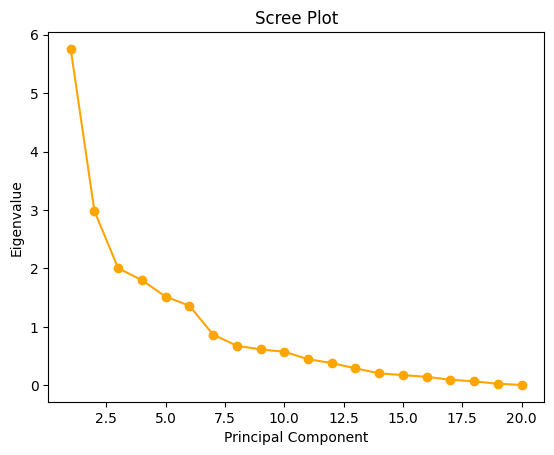

In [13]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [20]:
# perform k-means clustering with optimal number of clusters
fa = FactorAnalyzer(rotation="varimax", n_factors=6, method='principal')
fa.fit(X_norm_2019)
factor_scores_2019 = fa.transform(X_norm_2019)
kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto").fit(factor_scores_2019)

# add cluster labels to the factor scores dataframe
factor_scores_df_2019 = pd.DataFrame(factor_scores_2019, index=X_norm_2019.index, columns=[f"Factor{i+1}" for i in range(6)])
factor_scores_df_2019['Cluster'] = kmeans.labels_

# merge cluster labels with pay_gap_2021 dataframe
pay_gap_2019_clustered = pd.merge(paygap_2019, factor_scores_df_2019['Cluster'], left_index=True, right_index=True)

# display the clustered dataframe
pay_gap_2019_clustered[['Country','Cluster']]

,Country,Cluster
9,Austria,4
21,Belgium,0
33,Bulgaria,1
45,Croatia,2
57,Cyprus,2
69,Czech Republic,3
81,Denmark,0
93,Estonia,3
105,Finland,3
117,France,3


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Cluster'], **{})
chart

# Clusterization for 2021

In [24]:
X_2021 = paygap_2021[num_cols]

# normalizing features
X_norm_2021 = (X_2021 - X_2021.mean(axis=0))/X_2021.std(axis=0)

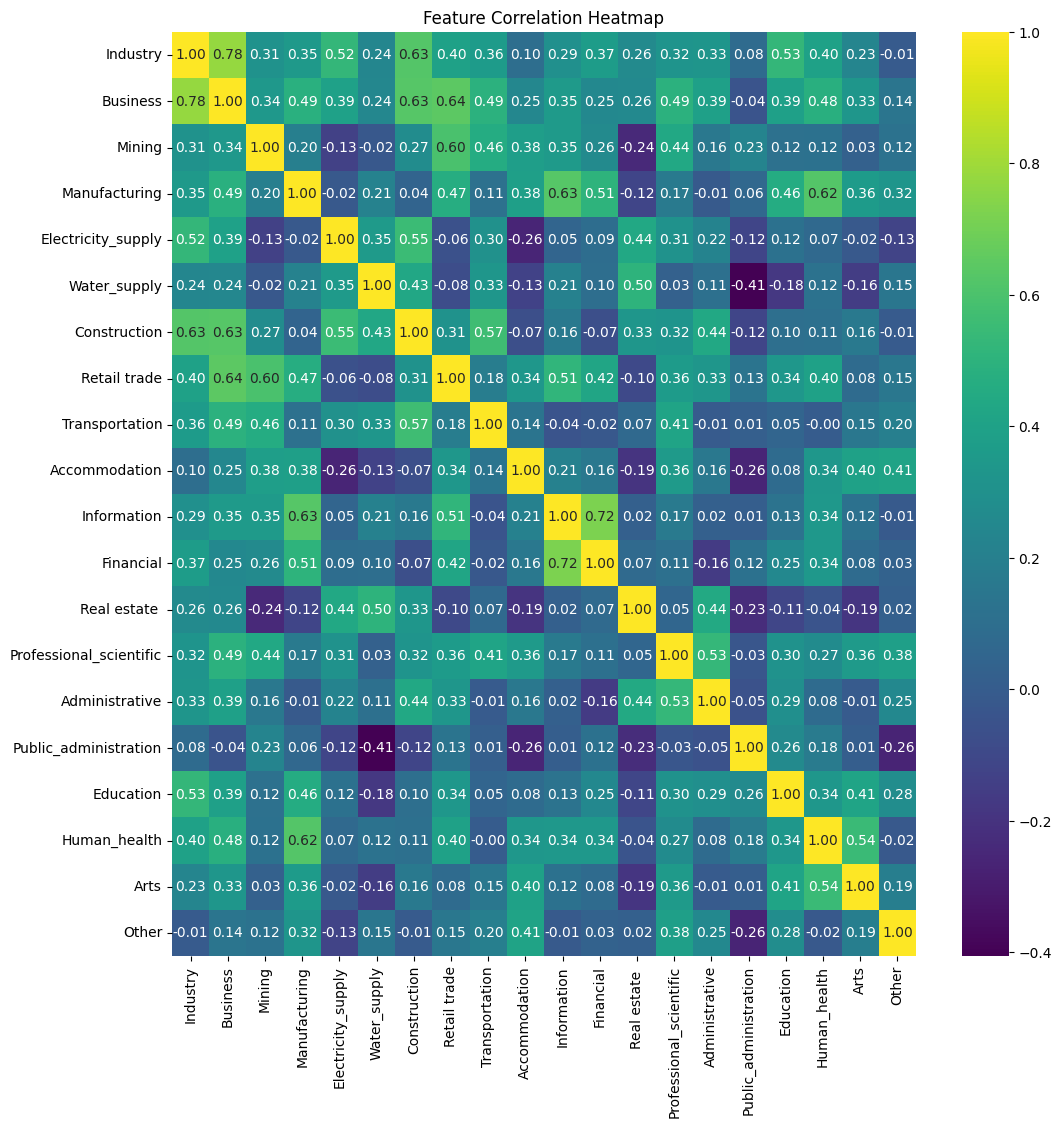

In [25]:
corr_matrix_2021 = np.corrcoef(X_norm_2021.T)

# create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix_2021, cmap='viridis', annot=True, fmt='.2f',
            xticklabels=paygap_2021[num_cols].columns, yticklabels=paygap_2021[num_cols].columns)

# set plot title
plt.title('Feature Correlation Heatmap')

# show plot
plt.show()

In [26]:
pca_2021 = PCA()

# fit and transform X_norm to PCA dataframe
X_pca_2021 = pca_2021.fit_transform(X_norm_2021)

# converting to dataframe
names_2021 = [f"PC{i+1}" for i in range(X_pca_2021.shape[1])]
X_pcadf_2021 = pd.DataFrame(X_pca_2021, columns=names_2021)

print(X_pcadf_2021.head())
print("Shape of PCA DataFrame:", X_pcadf_2021.shape)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.745620 -1.804230  0.255346 -0.631388  0.733525 -0.737805  1.923838   
1  4.721013 -2.588726  0.277407 -0.428417 -0.325585  0.704811 -0.058660   
2  0.506959  1.863001 -2.292793  0.056262 -0.407922  3.037037  0.094186   
3  0.577027  2.263994  1.472109  0.887107  0.747125 -0.378055  1.245859   
4 -2.126222  4.309534  3.956003 -1.779375 -1.081172  1.389354  0.339607   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.280335 -0.357864 -0.079956 -0.326708  0.473056 -0.523938 -0.809982   
1  1.794658 -0.153832 -1.101541 -0.733045 -0.760391  0.867090 -0.327826   
2 -0.517117  0.758827  0.316598  0.732991 -0.650042 -0.580269 -0.771431   
3  1.066336  0.168798  0.969925  0.422548 -0.417569  0.583325  0.212754   
4  0.339847 -0.664397 -0.883390  0.628847  0.103906  0.116512  0.109467   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.133962  0.066590 -0.104604 -0

In [29]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix_2021)
idx_2021 = eigenvalues.argsort()[::-1] # I sort the eigenvalues and eigenvectors in descending order
eigenvalues_2021 = eigenvalues[idx_2021]

eigenvalues_df_2021 = pd.DataFrame({'Eigenvalue': eigenvalues}, index=paygap_2021[num_cols].columns)
eigenvalues_df_2021['Proportion'] = eigenvalues_df_2021['Eigenvalue'] / eigenvalues_df_2021['Eigenvalue'].sum()
eigenvalues_df_2021['Cumulative Proportion'] = eigenvalues_df_2021['Proportion'].cumsum()

eigenvalues_df_2021

,Eigenvalue,Proportion,Cumulative Proportion
Industry,5.532720,0.276636,0.276636
Business,3.073648,0.153682,0.430318
Mining,2.006700,0.100335,0.530653
Manufacturing,1.750374,0.087519,0.618172
Electricity_supply,1.581195,0.079060,0.697232
Water_supply,1.304531,0.065227,0.762458
Construction,0.938653,0.046933,0.809391
Retail trade,0.750036,0.037502,0.846893
Transportation,0.669336,0.033467,0.880360
Accommodation,0.526711,0.026336,0.906695


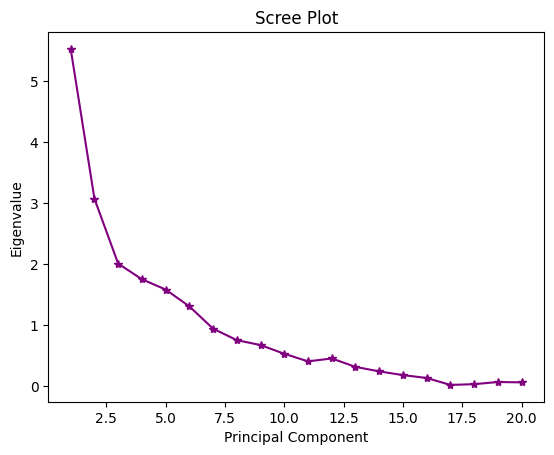

In [30]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='*', color='purple')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [31]:
features_2021 = paygap_2021[num_cols].columns

# fit factor analyzer with principal components and varimax rotation
fa_2021 = FactorAnalyzer(rotation="varimax", n_factors=6, method='principal')
fa_2021.fit(X_norm_2021)

factor_scores_2021 = fa.transform(X_norm_2021)

kmeans = KMeans(n_clusters=7, random_state=42, n_init= "auto").fit(factor_scores_2021)

# add cluster labels to the factor scores dataframe
factor_scores_df_2021 = pd.DataFrame(factor_scores_2021, index=X_norm_2021.index, columns=[f"Factor{i+1}" for i in range(6)])
factor_scores_df_2021['Cluster'] = kmeans.labels_

# merge cluster labels with pay_gap_2021 dataframe
pay_gap_2021_clustered = pd.merge(paygap_2021, factor_scores_df_2021['Cluster'], left_index=True, right_index=True)

# display the clustered dataframe
pay_gap_2021_clustered[['Country','Cluster']]

,Country,Cluster
11,Austria,5
23,Belgium,0
35,Bulgaria,1
47,Croatia,2
59,Cyprus,2
71,Czech Republic,5
83,Denmark,0
95,Estonia,5
107,Finland,5
119,France,3


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['Cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Cluster'], **{})
chart